## Informasi Mahasiswa 

Nama: Najla Raihana Kamila 

NPM: 2108107010067

## Jenis Dataset 

Pada tugas ini, saya menggunakan dataset https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset yang diambil dari Kaggle. Dataset ini berisi 9 kolom dengan jumlah baris sebanyak 768 mengenai data pasien yang menderita diabetes berumur minimal 21 tahun. 9 kolom yang terdapat di dalam dataset:
1. pregnancies : Jumlah kehamilan 
2. glucose : konsentrasi glukosa dalam plasma setelah 2 jam dalam uji toleransi glukosa oral
3. bloodpressure : Tekanan darah diastolic (mm Hg)
4. skinthickness : Ketebalan lipatan kulit trisep (mm)  
5. Insulin : Insulin serum 2 jam (mu U/ml)
6. bmi : Indeks Massa Tubuh (IMT) (berat dalam kg/(tinggi dalam m)^2)
7. diabetespedigree : Fungsi diabetes pedigree
8. age : Umur (tahun)
9. outcome : Hasil diabetes atau tidak 

### Studi Kasus
Membuat model prediksi diagnosa diabetes dengan melihat dari tingkat glucose dan BMI yang dimiliki oleh pasien

## Import library yang digunakan

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

## Gathering Data

In [89]:
# membaca dataset 
data = pd.read_csv('diabetes.csv')
data

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,False
764,2,122,70,27,0,36.8,0.340,27,False
765,5,121,72,23,112,26.2,0.245,30,False
766,1,126,60,0,0,30.1,0.349,47,True


## Assessing Data

In [90]:
# info tipe data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [91]:
# melihat ukuran data
data.size

6912

In [92]:
# mengecek missing value
data.isna().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64

In [93]:
# mengecek duplicate data
duplicate_rows = data[data.duplicated()]

# menampilkan baris duplikasi (jika ada)
if not duplicate_rows.empty:
    print("Duplikasi data ditemukan:")
    print(duplicate_rows)
else:
    print("Tidak ada duplikasi data.")

Tidak ada duplikasi data.


In [94]:
# melihat statistik parameter 
data.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Preprocessing Data

In [95]:
# mengubah label ke dalam bentuk numerik
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data["outcome"]=enc.fit_transform(data["outcome"]) # 1 iya, 0 tidak

In [97]:
# memisahkan variabel independen dan variabel dependen
X = data[['pregnancies','glucose', 'bloodpressure', 'skinthickness', 'insulin', 'bmi', 'diabetespedigreefunction','age']] # independen/fitur
Y = data['outcome'] # dependen/label 

In [98]:
# melakukan skala fitur sehingga jarak antar data seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # menyimpan data scaler

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [100]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: outcome
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [101]:
# melakukan split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [102]:
len(X_train)

614

In [103]:
len(y_train)

614

## Membuat model Keras

Model keras yang akan dibangun:
1. memiliki 3 hidden layer
2. Dengan total 22 neuron
3. Menggunakan dua jenis activation function yaitu RelU untuk layer pertama dan kedua sedangkan layer terakhir menggunakan function Sigmoid karena output yang diharapkan adalah 2 kategori

In [104]:
# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(12, activation = 'relu', input_dim=8))
# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(8, activation = 'relu'))
# Menambah output layer
MesinKlasifikasi.add(Dense(1, activation = 'sigmoid')) # gunakan sigmoid function karena output adalah 2 kategori (0/1)

In [105]:
MesinKlasifikasi.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 12)                108       
                                                                 
 dense_13 (Dense)            (None, 8)                 104       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
# Compile model NN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [107]:
# Fitting pada Keras Model 
history = MesinKlasifikasi.fit(X_train, y_train, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150


42/42 [==============================] - 2s 11ms/step - loss: 0.7213 - accuracy: 0.3893 - val_loss: 0.6895 - val_accuracy: 0.5123
Epoch 2/150
42/42 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.5547 - val_loss: 0.6571 - val_accuracy: 0.6798
Epoch 3/150
42/42 [==============================] - 0s 6ms/step - loss: 0.6377 - accuracy: 0.6861 - val_loss: 0.6313 - val_accuracy: 0.7094
Epoch 4/150
42/42 [==============================] - 0s 7ms/step - loss: 0.6039 - accuracy: 0.7324 - val_loss: 0.6077 - val_accuracy: 0.6700
Epoch 5/150
42/42 [==============================] - 0s 5ms/step - loss: 0.5755 - accuracy: 0.7324 - val_loss: 0.5922 - val_accuracy: 0.6897
Epoch 6/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5507 - accuracy: 0.7348 - val_loss: 0.5762 - val_accuracy: 0.6897
Epoch 7/150
42/42 [==============================] - 0s 6ms/step - loss: 0.5257 - accuracy: 0.7445 - val_loss: 0.5619 - val_accuracy: 0.6897
Epoch 8/150
42/42 [=====

## Plot model Loss and Accuracy

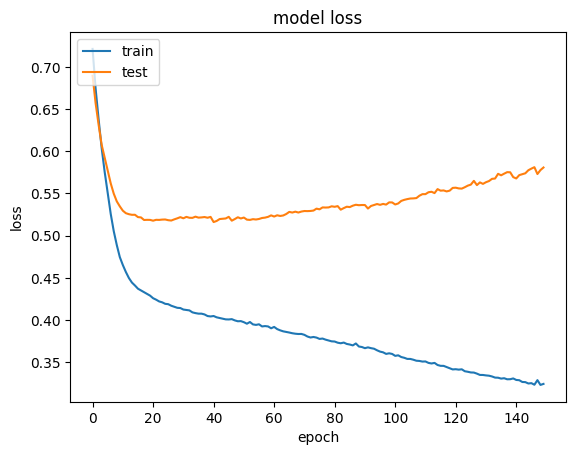

In [110]:
# Membuat plot loss model
plt.plot(MesinKlasifikasi.history.history['loss'])
plt.plot(MesinKlasifikasi.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

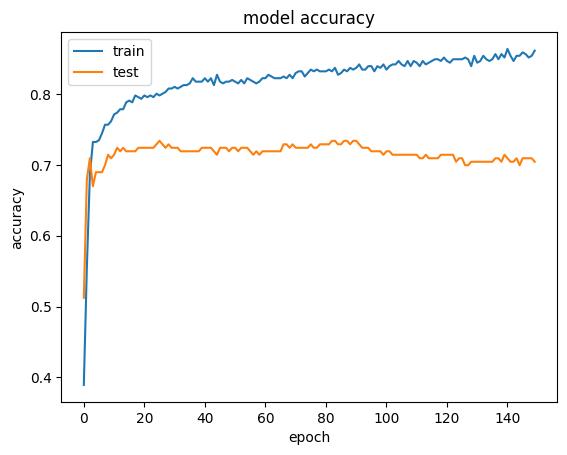

In [111]:
# Membuat plot akurasi model
plt.plot(MesinKlasifikasi.history.history['accuracy'])
plt.plot(MesinKlasifikasi.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediksi model 

In [112]:
# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5) # jika nilai probabilitas > 0.5, maka akan bernilai 1
y_pred

5/5 [==============================] - 0s 3ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [119]:
y_pred = MesinKlasifikasi.predict(X_test)

# membuat y_pred menjadi 0 atau 1
data_replace = []
for x in y_pred:
    data_replace.append(x[0])

data_baru = [1 if x else 0 for x in data_replace] 

accuracy = accuracy_score(y_test, data_baru)
print("Accuracy:", accuracy)

5/5 [==============================] - 0s 6ms/step
Accuracy: 0.35714285714285715


In [121]:
# melihat classification report 
print("Classification Report:")
print(classification_report(y_test, data_baru))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.18      0.50      0.26       154
weighted avg       0.13      0.36      0.19       154



c:\Users\najla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\najla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\najla\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,